In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns
import pandas as pd

In [2]:
bandits = [0.1, -0.8, 1.6, 0.2, 1.3, -1.4, -0.1, -1.0, 0.9, -0.5]
optimal = np.argmax(bandits)
optimal

2

In [12]:
def softmax(H):
    e = np.array(list(map(lambda x: np.exp(x), H)))
    return e / sum(e)

softmax([0.1, 0.1, 0.1])

array([0.33333333, 0.33333333, 0.33333333])

In [16]:
n_steps = 1000

def gradient_bandit(alpha, compare=True):
    
    H = np.zeros(10)
    memory_reward = np.zeros(n_steps)
    memory_optimal = np.zeros(n_steps)
    
    for step in range(n_steps):
        
        action = np.argmax(H)
        memory_optimal[step] = optimal == action
        
        R = np.random.normal(bandits[action], 1)
        memory_reward[step] = R
        
        if compare:
            H = H + alpha * (R - np.average(memory_reward[:step+1])) * (np.eye(10)[action] - softmax(H))
        else:
            H = H + alpha * R * (np.eye(10)[action] - softmax(H))
        
    return memory_reward, memory_optimal
        

In [24]:
optimals = [np.zeros(1000), np.zeros(1000), np.zeros(1000), np.zeros(1000)]

for i in range(1000):
    optimals[0] += gradient_bandit(0.1)[1]
    optimals[1] += gradient_bandit(0.1, False)[1]
    optimals[2] += gradient_bandit(0.4)[1]
    optimals[3] += gradient_bandit(0.4, False)[1]
    
    if(i%100 == 0): print(i, " done")

0  done
100  done
200  done
300  done
400  done
500  done
600  done
700  done
800  done
900  done


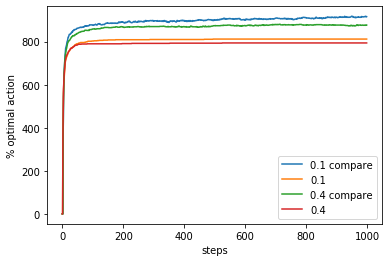

In [25]:
plt.plot(range(1000), optimals[0])
plt.plot(range(1000), optimals[1])
plt.plot(range(1000), optimals[2])
plt.plot(range(1000), optimals[3])

plt.legend(["0.1 compare", "0.1", "0.4 compare", "0.4"])
plt.xlabel("steps")
plt.ylabel("% optimal action")

plt.show()